In [161]:
#import libraries--
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
IMG_SIZE=50



In [162]:
#create a training dataset from images--
DATADIR1="Downloads/Datasets/train"
CATEGORIES1=["man","woman"]

training_data=[]
def create_training_data():
    for category in CATEGORIES1:
        path=os.path.join(DATADIR1,category)
        class_num=CATEGORIES1.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
print(len(training_data))

2068


In [163]:
#create a test dataset from images--
DATADIR2="Downloads/Datasets/test"
CATEGORIES2=["man","woman"]
test_data=[]
def create_test_data():
    for category in CATEGORIES2:
        path=os.path.join(DATADIR2,category)
        class_num=CATEGORIES2.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()
print(len(test_data))

200


In [164]:
#shuffling of data--
import random
random.shuffle(training_data)
random.shuffle(test_data)

In [165]:
#split training data into features and label--
train_X=[]
train_y=[]
for features,label in training_data:
    train_X.append(features)
    train_y.append(label)
train_X=np.array(train_X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
train_X=train_X/255.0

In [166]:
#split test data into features and label--
test_X=[]
test_y=[]
for features,label in test_data:
    test_X.append(features)
    test_y.append(label)    
test_X=np.array(test_X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_X=test_X/255.0

In [167]:
#creating a model--
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
activation_25 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_26 (Activation)   (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 11, 11, 64)        0         
__________

In [154]:
#training the model--
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
result=model.fit(train_X,train_y,batch_size=10,epochs=20,validation_split=0.1)

Train on 1861 samples, validate on 207 samples
Epoch 1/20
1861/1861 [==============================] - 20s 11ms/step - loss: 0.5450 - acc: 0.7082 - val_loss: 0.4152 - val_acc: 0.7971
Epoch 2/20
1861/1861 [==============================] - 16s 8ms/step - loss: 0.3516 - acc: 0.8350 - val_loss: 0.3032 - val_acc: 0.8841
Epoch 3/20
1861/1861 [==============================] - 16s 9ms/step - loss: 0.2958 - acc: 0.8812 - val_loss: 0.4120 - val_acc: 0.8406
Epoch 4/20
1861/1861 [==============================] - 16s 9ms/step - loss: 0.2556 - acc: 0.8958 - val_loss: 0.3087 - val_acc: 0.8744
Epoch 5/20
1861/1861 [==============================] - 16s 9ms/step - loss: 0.2360 - acc: 0.9017 - val_loss: 0.3258 - val_acc: 0.8502
Epoch 6/20
1861/1861 [==============================] - 16s 9ms/step - loss: 0.2042 - acc: 0.9199 - val_loss: 0.2956 - val_acc: 0.8744
Epoch 7/20
1861/1861 [==============================] - 16s 9ms/step - loss: 0.1777 - acc: 0.9264 - val_loss: 0.3065 - val_acc: 0.8889
Epoch 8

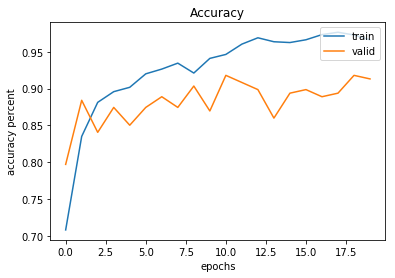

In [159]:
#Graphical representation--
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy percent')
plt.xlabel('epochs')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [160]:
#prediction on test dataset
test_loss,test_accu=model.evaluate(test_X,test_y)
print(test_loss,test_accu)

200/200 [==============================] - 0s 2ms/step
0.2939729917049408 0.925
